
<img src="../../images/brownbear.png" width="400">

## A financial tool that can analyze and maximize investment portfolios on a risk adjusted basis  


Description: This notebook is useful for examining potfolios comprised of investments options from the dow30 and alabama.  Construct portfolios from the Investment Options in the dow30+alabama and examine the results of different weighting schemes.


In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import brownbear as bb

# format price data
pd.options.display.float_format = '{:0.2f}'.format

# display all rows
pd.set_option('display.max_rows', None)

# do not truncate column names
pd.set_option('display.max_colwidth', None)

%matplotlib inline

In [3]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

### Some Globals

In [4]:
investment_universe = ['dow30-galaxy', 'alabama-galaxy']
risk_free_rate = 0
annual_returns = '5 Yr'

In [5]:
# Fetch Investment Options - all values annualized
df = bb.fetch(investment_universe, risk_free_rate, annual_returns)
df

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
0,MMM,3M,US Stocks:Industrials,-11.10,-13.79,48.31,-0.17,1.40,16.21,9.08,30.93,1.40,0.05
1,AXP,American Express,US Stocks:Financials,6.89,65.38,65.00,24.40,21.19,24.63,17.19,26.99,21.19,0.79
2,AMGN,Amgen,US Stocks:Healthcare,-53.28,-54.17,-11.21,7.96,4.60,16.27,11.26,24.62,4.60,0.19
3,AMZN,Amazon,US Stocks:Consumer Discretionary,80.34,130.44,51.00,9.95,19.40,26.77,16.18,34.32,19.40,0.57
4,AAPL,Apple,US Stocks:Technology,3.57,35.84,32.73,11.55,27.88,18.37,12.20,26.03,27.88,1.07
5,BA,Boeing,US Stocks:Industrials,200.84,62.33,-30.34,-5.72,-12.10,26.73,13.63,41.00,-12.10,-496.10
6,CAT,Caterpillar,US Stocks:Industrials,-67.26,-24.05,30.01,23.27,22.42,18.52,14.57,36.34,22.42,0.62
7,CVX,Chevron,US Stocks:Energy,-66.41,-8.69,0.22,11.86,8.69,20.86,15.79,28.18,8.69,0.31
8,CSCO,Cisco,US Stocks:Technology,-4.33,63.21,20.21,0.74,7.62,12.75,7.76,20.89,7.62,0.36
9,KO,Coca-Cola,US Stocks:Consumer Staples,-28.76,-41.21,5.33,4.50,5.27,12.70,5.73,14.16,5.27,0.37


In [6]:
# rank
rank = bb.rank(df, rank_by='Sharpe Ratio')
rank_filtered = rank
#rank_filtered = rank.loc[(rank['3 mo'] > 0) & rank['1 Yr'] > 0]
rank_filtered

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
21,NVDA,Nvidia,US Stocks:Technology,42.72,91.31,203.79,69.75,89.85,36.09,16.13,54.01,89.85,1.66
30,ROAD,Construction Partners Inc,US Stocks:Industrials,-67.99,240.04,123.91,45.85,40.26,38.13,26.82,35.73,40.26,1.13
4,AAPL,Apple,US Stocks:Technology,3.57,35.84,32.73,11.55,27.88,18.37,12.20,26.03,27.88,1.07
19,MSFT,Microsoft,US Stocks:Technology,-19.79,6.70,14.86,8.50,22.88,18.51,14.02,21.62,22.88,1.06
29,WMT,Walmart,US Stocks:Consumer Discretionary,-28.04,63.73,73.01,25.68,19.82,18.38,11.75,19.97,19.82,0.99
11,GS,Goldman Sachs,US Stocks:Financials,-35.96,106.91,55.63,17.74,23.31,22.53,16.00,27.78,23.31,0.84
1,AXP,American Express,US Stocks:Financials,6.89,65.38,65.00,24.40,21.19,24.63,17.19,26.99,21.19,0.79
14,IBM,IBM,US Stocks:Technology,-28.64,-0.13,42.97,23.49,16.82,22.03,16.79,22.56,16.82,0.75
26,UNH,UnitedHealth Group,US Stocks:Healthcare,-85.60,-43.03,-3.87,2.02,13.43,41.64,32.01,18.79,13.43,0.71
25,TRV,Travelers,US Stocks:Financials,-56.12,18.29,28.96,18.02,14.61,19.53,15.84,21.39,14.61,0.68


### Sample Portfolios
Format 'Investment option': weight

In [7]:
# everything ranked
ranked_portfolio = {
    'Title': 'Ranked Portfolio'
}
everything = list(rank_filtered['Investment Option'])[:20]
ranked_portfolio.update(dict.fromkeys(everything, 1/len(everything)))

# top 10
top10_portfolio = {
    'Title': 'Top10 Portfolio'
}
top10 = list(rank['Investment Option'])[:10]
top10_portfolio.update(dict.fromkeys(top10, 1/len(top10)))

### Custom Portfolios

In [8]:
# My portfolio
my_portfolio = {
    'Title': 'My Portfolio',

}

### Choose Portfolio Option

In [9]:
# Select one of the portfolios from above
portfolio_option = ranked_portfolio

In [10]:
# Make a copy so that the original portfolio is preserved
portfolio_option = portfolio_option.copy()
portfolio_option

{'Title': 'Ranked Portfolio',
 'NVDA': 0.05,
 'ROAD': 0.05,
 'AAPL': 0.05,
 'MSFT': 0.05,
 'WMT': 0.05,
 'GS': 0.05,
 'AXP': 0.05,
 'IBM': 0.05,
 'UNH': 0.05,
 'TRV': 0.05,
 'HD': 0.05,
 'CAT': 0.05,
 'MCD': 0.05,
 'V': 0.05,
 'JPM': 0.05,
 'AMZN': 0.05,
 'VMC': 0.05,
 'PG': 0.05,
 'EHC': 0.05,
 'CRM': 0.05}

### Analysis Options

In [11]:
# Specify the weighting scheme.  It will replace the weights specified in the portfolio
# You can also fix the weights on some Investent Options, Asset Classes, and Asset Subclasses
# while the others are automatically calculated.

# 'Equal' - will use equal weights.

# 'Sharpe Ratio' - will use proportionally weighted # allocations based on the percent
#  of an investment option's sharpe ratio to the sum of all the sharpe ratios in the portfolio.

# 'Std Dev' - will use standard deviation adjusted weights

# 'Annual Returns' - will use return adjusted weights

# 'Vola' - will use volatility adjusted weights

# 'DS Vola' - will use downside volatility adjusted weights

# None: 'Investment Option' means use user specified weights
#       'Asset Class' means do not group by Asset Class
#       'Asset Subclass means do not group by Asset Subclass 

weight_by = {
    'Asset Class':       {'weight_by': None},
    'Asset Subclass':    {'weight_by': 'Sharpe Ratio'},
    'Investment Option': {'weight_by': 'Equal'},
}
#weight_by = None

In [12]:
bb.DEBUG = False

# Analyze portfolio
annual_ret, std_dev, sharpe_ratio = \
    bb.analyze(df, portfolio_option, weight_by)

,NVDA,ROAD,AAPL,MSFT,WMT,GS,AXP,IBM,UNH,TRV,...,CAT,MCD,V,JPM,AMZN,VMC,PG,EHC,CRM,Ranked Portfolio
Annual Returns,89.85,40.26,27.88,22.88,19.82,23.31,21.19,16.82,13.43,14.61,...,22.42,10.86,11.62,15.06,19.40,13.29,8.39,12.02,15.53,21.32
Std Dev,54.01,35.73,26.03,21.62,19.97,27.78,26.99,22.56,18.79,21.39,...,36.34,17.85,19.56,26.49,34.32,26.61,17.89,26.35,37.74,21.12
Sharpe Ratio,1.66,1.13,1.07,1.06,0.99,0.84,0.79,0.75,0.71,0.68,...,0.62,0.61,0.59,0.57,0.57,0.50,0.47,0.46,0.41,1.01
Weight,0.05,0.07,0.05,0.05,0.04,0.03,0.03,0.05,0.07,0.03,...,0.07,0.07,0.03,0.03,0.04,0.09,0.07,0.07,0.05,1.00
Worst Typical Down Year,-18.17,-31.20,-24.18,-20.36,-20.12,-32.25,-32.79,-28.30,-24.15,-28.17,...,-50.26,-24.84,-27.50,-37.92,-49.24,-39.93,-27.39,-40.68,-59.95,-20.92
Black Swan,-72.18,-66.93,-50.21,-41.98,-40.09,-60.03,-59.78,-50.86,-42.94,-49.56,...,-86.60,-42.69,-47.06,-64.41,-83.56,-66.54,-45.28,-67.03,-97.69,-42.04


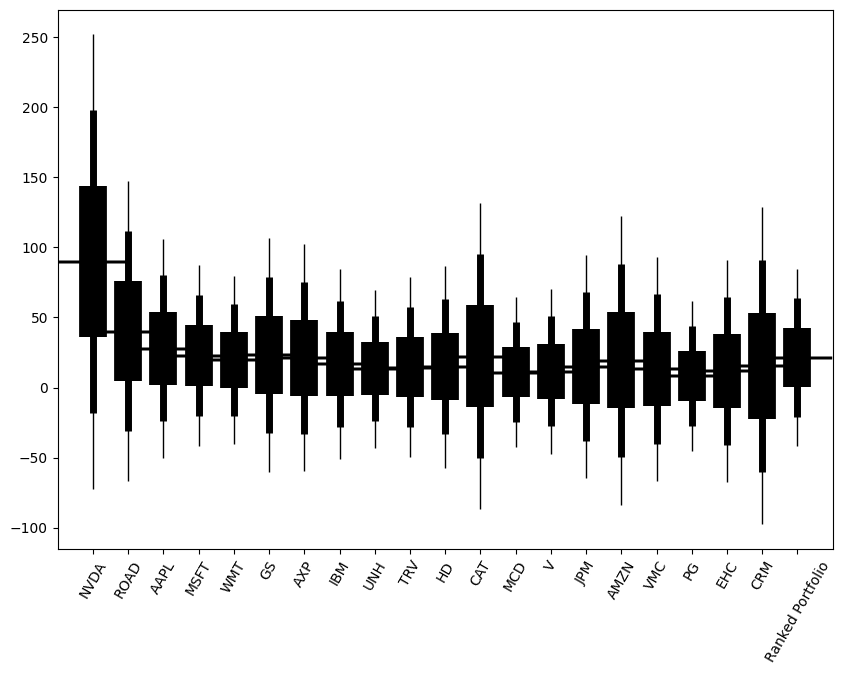

In [13]:
# Display Results
summary = bb.summary(df, portfolio_option, annual_ret, std_dev, sharpe_ratio)
summary

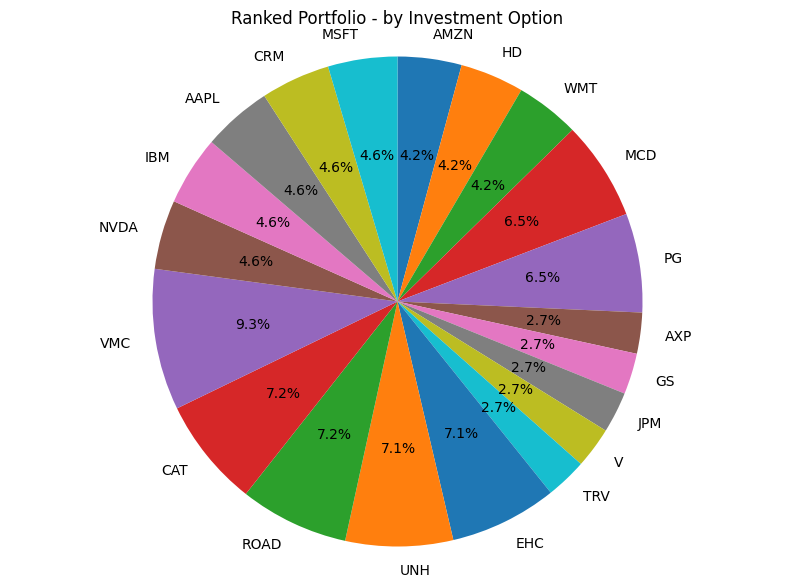

AMZN   0.04
HD     0.04
WMT    0.04
MCD    0.07
PG     0.07
AXP    0.03
GS     0.03
JPM    0.03
V      0.03
TRV    0.03
EHC    0.07
UNH    0.07
ROAD   0.07
CAT    0.07
VMC    0.09
NVDA   0.05
IBM    0.05
AAPL   0.05
CRM    0.05
MSFT   0.05



In [14]:
# Show pie charts of investment and asset class weights
bb.show_pie_charts(df, portfolio_option, charts=['Investment Option'])

In [15]:
# Show exact weights
bb.print_portfolio(portfolio_option)

Ranked Portfolio Weights:
    NVDA                           0.0457
    ROAD                           0.0719
    AAPL                           0.0457
    MSFT                           0.0457
    WMT                            0.0422
    GS                             0.0270
    AXP                            0.0270
    IBM                            0.0457
    UNH                            0.0709
    TRV                            0.0270
    HD                             0.0422
    CAT                            0.0719
    MCD                            0.0653
    V                              0.0270
    JPM                            0.0270
    AMZN                           0.0422
    VMC                            0.0932
    PG                             0.0653
    EHC                            0.0709
    CRM                            0.0457


### Optimize Portfolio

In [16]:
# Run_portfolio_optimizer = True will run portfolio optimizer after portfolio analysis is complete
run_portfolio_optimizer = True

In [17]:
# Optimize sharpe ratio while specifying Annual Rate, Worst Typical Down Year,
# and Black Swan.  Setting a constraint to None optimizes absolute Sharpe Ratio
# without regard to that constraint.

'''
constraints = {
    'Annual Return': 12,
    'Worst Typical Down Year': -5,
    'Black Swan': -20
}
'''

constraints = {
    'Annual Return': 8,
    'Worst Typical Down Year': None,
    'Black Swan': -40
}

if run_portfolio_optimizer:
    bb.optimizer(df, portfolio_option, constraints)

Running optimizer............

Ranked Portfolio Metrics:           
    max_sharpe_ratio            1.34
    annual_return              26.06
    std_dev                    19.45
    worst typical down year   -12.85
    black_swan                -32.30


Ranked Portfolio Weights:
    NVDA                           0.1400
    ROAD                           0.0000
    AAPL                           0.0500
    MSFT                           0.0600
    WMT                            0.1700
    GS                             0.0000
    AXP                            0.0400
    IBM                            0.0900
    UNH                            0.0700
    TRV                            0.0000
    HD                             0.0000
    CAT                            0.0000
    MCD                            0.0900
    V                              0.0900
    JPM                            0.0000
    AMZN                           0.0000
    VMC                            0.0400
    P

### Use Sharpe Ratio adjusted weights
Recommend that you also try using Sharpe Ratio adjusted weights and compare those results with the Optimized Portflio.  
It tends to produce a higher Annual Return while keeping the allocations more balanced than the Optimizer.  (See 'Analysis Options' section).